## _*Quantum SVM (quantum kernel method)*_

### Introduction

Please refer to [this file](./svm_qkernel.ipynb) for introduction.

This file shows an example how to use Aqua API to build SVM classifier and keep the instance for future prediction.

In [1]:
from datasets import *
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import get_input_instance
from qiskit_aqua import run_algorithm, get_feature_map_instance, get_algorithm_instance, get_multiclass_extension_instance

First we prepare the dataset, which is used for training, testing and the finally prediction.

*Note: You can easily switch to a different dataset, such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.*

In [2]:
n = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size, 
                                                                     test_size=testing_dataset_size, 
                                                                     n=n, gap=0.3, PLOT_DATA=False)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


With the dataset ready we initialize the necessary inputs for the algorithm:
- build all components required by SVM
    - feature_map
    - multiclass_extension (optional)

In [3]:
svm = get_algorithm_instance("QSVM.Kernel")
svm.random_seed = 10598
svm.setup_quantum_backend(backend='statevector_simulator')

feature_map = get_feature_map_instance('SecondOrderExpansion')
feature_map.init_args(num_qubits=2, depth=2, entanglement='linear')

svm.init_args(training_input, test_input, datapoints[0], feature_map)

With everything setup, we can now run the algorithm.

The run method includes training, testing and predict on unlabeled data.

For the testing, the result includes the success ratio.

For the prediction, the result includes the predicted class names for each data.

After that the trained model is also stored in the svm instance, you can use it for future prediction.

In [4]:
result = svm.run()

kernel matrix during the training:


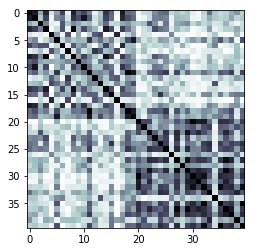

testing success ratio:  1.0
predicted classes: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [5]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])
print("predicted classes:", result['predicted_classes'])

Use the trained model to evaluate data directly, and we store a `label_to_class` and `class_to_label` for helping converting between label and class name

In [6]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("preduction:   {}".format(predicted_labels))

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
preduction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
